In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import support
from support import DATASET, NR_PLACES, NR_TRANSITIONS, NAMES_TO_TRANSITION, activities
# Import data

df = DATASET.copy()



In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("evaluate", support.fitness)

toolbox.register("attr_int", np.random.randint, 0, NR_PLACES) 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2*NR_TRANSITIONS) # generate 24 ints between 0 and 9
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
stats.register("std", np.std)


CXPB = 0.7      # Crossover Probability
MUTPB = 0.2      # Mutation Probability
NGEN = 40        # Number of Generations
POPSIZE = 100     # Population Size
INDPB = 0.2       # Individual Probability
TOURNSIZE = 3       # Tournament Size

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)

hof = tools.HallOfFame(1)
pop = toolbox.population(n=POPSIZE) # 100 individuals
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	min	max     	std   
0  	100   	-8.98472	-16	-3.66653	2.6441
1  	81    	-7.57545	-15	-3.66653	2.58597
2  	81    	-5.66436	-13	-1.66653	1.9574 
3  	71    	-5.04363	-16	-1.6031 	2.64739
4  	78    	-4.06227	-13	0.15384 	2.57444
5  	81    	-3.23124	-12.888	0.333465	2.47752
6  	72    	-2.12441	-8     	0.359972	1.88098
7  	69    	-1.8961 	-13    	0.350132	2.77426
8  	72    	-1.40385	-13    	0.411802	2.77543
9  	87    	-1.21081	-10    	0.513094	2.34624
10 	84    	-0.859303	-10.6726	0.513094	2.33902
11 	75    	-0.859195	-9.72257	0.513094	2.50393
12 	71    	-0.941496	-11     	0.513094	2.70361
13 	74    	-0.658532	-9.91891	0.513094	2.4007 
14 	73    	-0.685465	-9.60899	0.513094	2.60492
15 	66    	-0.455363	-9.71375	0.513094	2.10689
16 	86    	-0.842998	-9.69362	0.513094	2.46229
17 	66    	-0.234304	-9.5882 	0.513094	2.00639
18 	70    	-0.717446	-11.5215	0.513094	2.73978
19 	74    	-0.573215	-13     	0.513094	2.63447
20 	91    	-0.479989	-9      	0.513094	2.29739
21 	69    	-0.

In [ ]:
best_ind = hof[0]
print("\n--- Best Individual Found ---")

best_matrix = support.list_to_array(best_ind)
print(best_matrix)


--- Best Individual Found ---
[[2 1]
 [4 5]
 [0 1]
 [1 3]
 [5 8]
 [3 7]
 [3 6]
 [1 7]
 [3 4]
 [6 8]
 [1 2]
 [4 5]]


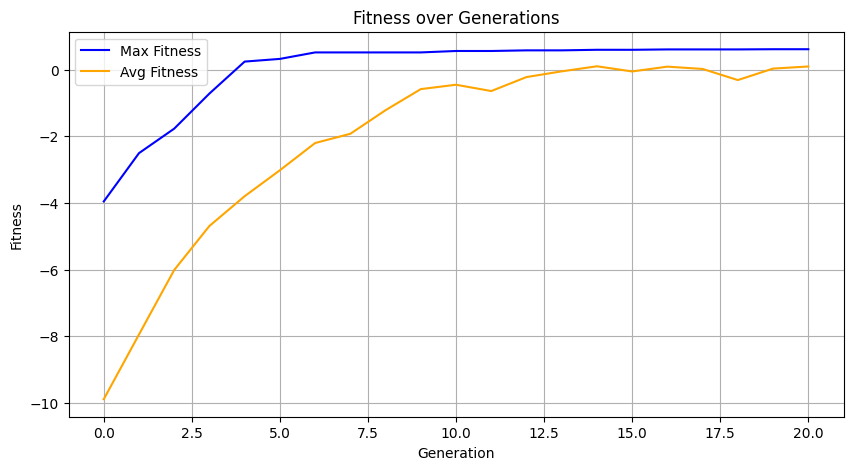

In [ ]:
## Plotting the results
import matplotlib.pyplot as plt

gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 5))
plt.plot(gen, fit_max, label="Max Fitness", color='blue')
plt.plot(gen, fit_avg, label="Avg Fitness", color='orange')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over Generations")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# +----------------+----------------------+-------------------+---------+
# |   Crossover    |       Mutation       |     Selection     |  Time   |
# |                |                      |                   | (s)     |
# +----------------+----------------------+-------------------+---------+
# | cxTwoPoint     | mutFlipBit           | selTournament     |         |
# | cxTwoPoint     | mutFlipBit           | selRoulette       |         |
# | cxTwoPoint     | mutShuffleIndexes    | selTournament     |         |
# | cxTwoPoint     | mutShuffleIndexes    | selRoulette       |         |
# | cxOrdered      | mutFlipBit           | selTournament     |         |
# | cxOrdered      | mutFlipBit           | selRoulette       |         |
# | cxOrdered      | mutShuffleIndexes    | selTournament     |         |
# | cxOrdered      | mutShuffleIndexes    | selRoulette       |         |
# +----------------+----------------------+-------------------+---------+

import itertools

CROSSOVERS = [tools.cxTwoPoint, tools.cxOrdered]
MUTATIONS = [tools.mutFlipBit, tools.mutShuffleIndexes]
SELECTIONS = [tools.selTournament, tools.selRoulette]

combinations = list(itertools.product(CROSSOVERS, MUTATIONS, SELECTIONS))

for combination in combinations:

    

# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
# toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)